In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.cross_validation import KFold
import seaborn as sns
%matplotlib inline
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV


In [6]:
datafile_train=r'C:/Users/aditya/Desktop/Shikha Desktop/Python/Project 2/carvan_train.csv'
datafile_test=r'C:/Users/aditya/Desktop/Shikha Desktop/Python/Project 2/carvan_test.csv'
cd_train=pd.read_csv(datafile_train)
cd_test=pd.read_csv(datafile_test)

In [3]:
cd_train.shape

(5822, 86)

In [4]:
cd_test.shape

(4000, 85)

In [10]:
cd_train['V6'].value_counts()

0    3228
1    1599
2     733
3     152
4      66
5      18
6      13
7       6
9       4
8       3
Name: V6, dtype: int64

In [11]:
cd_test['V6'].nunique()

9

In [12]:
for col in cd_test.select_dtypes('int64').columns:
    print(col,':',cd_test[col].nunique())

V1 : 40
V2 : 9
V3 : 6
V4 : 6
V5 : 10
V6 : 9
V7 : 10
V8 : 6
V9 : 10
V10 : 10
V11 : 8
V12 : 10
V13 : 10
V14 : 10
V15 : 10
V16 : 10
V17 : 10
V18 : 10
V19 : 10
V20 : 6
V21 : 9
V22 : 10
V23 : 10
V24 : 10
V25 : 10
V26 : 10
V27 : 10
V28 : 10
V29 : 9
V30 : 10
V31 : 10
V32 : 10
V33 : 9
V34 : 10
V35 : 10
V36 : 10
V37 : 10
V38 : 10
V39 : 10
V40 : 10
V41 : 7
V42 : 10
V43 : 8
V44 : 4
V45 : 7
V46 : 5
V47 : 7
V48 : 4
V49 : 5
V50 : 3
V51 : 4
V52 : 6
V53 : 6
V54 : 6
V55 : 8
V56 : 6
V57 : 3
V58 : 3
V59 : 9
V60 : 3
V61 : 6
V62 : 2
V63 : 6
V64 : 5
V65 : 3
V66 : 2
V67 : 2
V68 : 7
V69 : 3
V70 : 4
V71 : 4
V72 : 3
V73 : 6
V74 : 4
V75 : 4
V76 : 6
V77 : 2
V78 : 2
V79 : 2
V80 : 6
V81 : 2
V82 : 3
V83 : 4
V84 : 2
V85 : 2


In [13]:
cd_test.isnull().sum().sum()

0

In [14]:
cd_test.head(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0


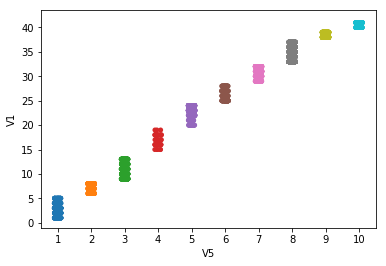

In [15]:
sns.stripplot(x='V5', y="V1", data=cd_train,jitter=True)

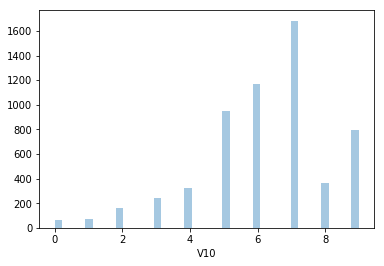

In [16]:
sns.distplot(cd_train["V10"],bins=40,kde=False) # I have taken kde=False just to obtain histogram

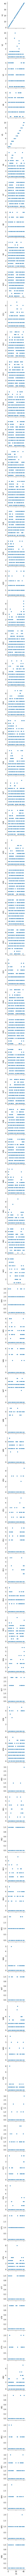

In [21]:
sns.pairplot(cd_train, y_vars=cd_train.columns, x_vars=['V1'], size=2.5)

In [7]:
for col in ['V1','V4','V5','V6','V44']:
    
    temp=pd.get_dummies(cd_train[col],prefix=col,drop_first=True)
    cd_train=pd.concat([temp,cd_train],1)
    cd_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cd_test[col],prefix=col,drop_first=True)
    cd_test=pd.concat([temp,cd_test],1)
    cd_test.drop([col],1,inplace=True)


In [8]:
cd_train.dropna(axis=0,inplace=True)
cd_test.dropna(axis=0,inplace=True)

In [9]:
cd_train.drop(['V6_8'],1,inplace=True)

In [10]:
xs=cd_train.drop(['V86'],1)
ys=cd_train['V86']

x_train, x_test, y_train, y_test = train_test_split(xs, ys,
                                                    test_size=0.1,
                                                    random_state=2,
                                                    stratify=ys)


x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)

y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)


In [11]:
len(y_train)

5239

# Logistics Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split,KFold

In [71]:
logr=LogisticRegression(penalty="l2",class_weight="balanced",random_state=2)
logr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=2,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [74]:
#finding out the best parameter for logistic using l2 penalty
C_param =[0.0001,0.0002,0.0005,0.001,0.005,0.01,0.05, 0.1,0.5, 1, 10, 100,500,1000] 
auc_10cv=[]
for c in C_param:
    logr=LogisticRegression(C=c,penalty="l2",class_weight="balanced",random_state=2)
    kf = KFold(len(x_train), n_folds=10)
    score_c=0
    for train, test in kf:
        logr.fit(x_train.loc[train], y_train[train])
        score_c+=roc_auc_score(y_train,logr.predict(x_train))
    auc_10cv.append(score_c/10)
    print('{:.3f}\t {:.5f}\t '.format(c,score_c/10))
C_param=np.array(C_param)
auc_10cv=np.array(auc_10cv)
best_c=C_param[auc_10cv==max(auc_10cv)][0]
print('Value of C with max AUC score:',max(auc_10cv),' for 10 fold CV is :',best_c )

0.000	 0.67619	 
0.000	 0.68011	 
0.001	 0.69036	 
0.001	 0.69977	 
0.005	 0.72047	 
0.010	 0.72656	 
0.050	 0.73479	 
0.100	 0.73799	 
0.500	 0.74378	 
1.000	 0.74564	 
10.000	 0.74473	 
100.000	 0.74457	 
500.000	 0.74487	 
1000.000	 0.74459	 
Value of C with max AUC score: 0.7456391360992047  for 10 fold CV is : 1.0


In [75]:
logrl2=LogisticRegression(C=best_c,penalty="l2",class_weight="balanced",random_state=2)

In [76]:
logrl2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=2,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [77]:
roc_auc_score(y_train,logrl2.predict(x_train))

0.7546978630842757

In [78]:
roc_auc_score(y_test,logrl2.predict(x_test))

0.6403457273320288

In [79]:
#finding out the best parameter for logistic using l1 penalty
C_param =[0.0001,0.0002,0.0005,0.001,0.005,0.01,0.05, 0.1,0.5, 1, 10, 100,500,1000] 
auc_10cv=[]
for c in C_param:
    logr=LogisticRegression(C=c,penalty="l1",class_weight="balanced",random_state=2)
    kf = KFold(len(x_train), n_folds=10)
    score_c=0
    for train, test in kf:
        logr.fit(x_train.loc[train], y_train[train])
        score_c+=roc_auc_score(y_train,logr.predict(x_train))
    auc_10cv.append(score_c/10)
    print('{:.3f}\t {:.5f}\t '.format(c,score_c/10))
C_param=np.array(C_param)
auc_10cv=np.array(auc_10cv)
best_c=C_param[auc_10cv==max(auc_10cv)][0]
print('Value of C with max AUC score:',max(auc_10cv),' for 10 fold CV is :',best_c )

0.000	 0.50000	 
0.000	 0.50000	 
0.001	 0.66198	 
0.001	 0.66529	 
0.005	 0.66684	 
0.010	 0.68138	 
0.050	 0.71347	 
0.100	 0.72380	 
0.500	 0.74114	 
1.000	 0.74286	 
10.000	 0.74583	 
100.000	 0.74471	 
500.000	 0.74496	 
1000.000	 0.74484	 
Value of C with max AUC score: 0.7458332443430962  for 10 fold CV is : 10.0


In [81]:
logr=LogisticRegression(C=best_c,penalty="l1",class_weight="balanced",random_state=2)

In [82]:
logr.fit(x_train,y_train)

LogisticRegression(C=10.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=2,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [83]:
roc_auc_score(y_train,logr.predict(x_train))

0.7562964015633805

In [84]:
roc_auc_score(y_test,logr.predict(x_test))

0.6350293542074364

In [104]:
prob_score=pd.Series(list(zip(*logr.predict_proba(x_train)))[1])

# Ada Boost

In [12]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

In [13]:
x_test.shape

(583, 144)

In [14]:
max_nodes=[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
max_nodes

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [16]:
beta=2
FB_avg=[]
for max_node  in max_nodes:
    mytree = DecisionTreeClassifier(criterion="entropy",
                                         max_leaf_nodes=max_node,class_weight="balanced")

    # computing average RMSE across 10-fold cross validation
    kf = KFold(len(x_train), n_folds=10)
    FB_total = []
    for train, test in kf:
        mytree.fit(x_train.loc[train], y_train[train])
        p = mytree.predict(x_train.loc[test])
        df=pd.DataFrame(list(zip(y_train,p)),columns=["real","predicted"])
        TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
        FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
        TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
        FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
        P=TP+FN
        N=TN+FP
        Precision=TP/(TP+FP)
        Recall=TP/P
        FB=(1+beta**2)*Precision*Recall/((beta**2)*Precision+Recall)
        
        FB_total.extend([FB])
    FB_avg.extend([np.mean(FB_total)])
best_max_node=np.array(max_nodes)[FB_avg==max(FB_avg)][0]

print('max_node value with best F2 score is :',best_max_node)


max_node value with best F2 score is : 6


In [17]:
base_clf=DecisionTreeClassifier(criterion="entropy",
                                  max_leaf_nodes=best_max_node,class_weight="balanced")

In [19]:
adb=AdaBoostClassifier(base_estimator=base_clf)
adb_params={'n_estimators':[50,100,200,500,700,800,900],
           'learning_rate': [0.005,0.01,.1,]
           }
kfolds = StratifiedKFold(10)
#kfolds = 10

In [20]:
complete_search=GridSearchCV(adb,scoring='roc_auc',param_grid=adb_params,cv=kfolds.split(x_train,y_train),n_jobs=-1,verbose=2)
#complete_search=GridSearchCV(adb,scoring='roc_auc',param_grid=adb_params,cv=kfolds,n_jobs=-1,verbose=2)

In [21]:
complete_search.fit(x_train,y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed: 39.8min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000000A454BD60F8>,
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=13,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200, 500, 700, 800, 900], 'learning_rate': [0.005, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [22]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [23]:
report(complete_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.743 (std: 0.03126)
Parameters: {'learning_rate': 0.005, 'n_estimators': 50}

Model with rank: 2
Mean validation score: 0.725 (std: 0.04078)
Parameters: {'learning_rate': 0.005, 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.724 (std: 0.03527)
Parameters: {'learning_rate': 0.01, 'n_estimators': 50}

Model with rank: 4
Mean validation score: 0.716 (std: 0.04649)
Parameters: {'learning_rate': 0.01, 'n_estimators': 100}

Model with rank: 5
Mean validation score: 0.712 (std: 0.05576)
Parameters: {'learning_rate': 0.005, 'n_estimators': 200}



In [23]:
adb_best=AdaBoostClassifier(base_estimator=base_clf,n_estimators=100,learning_rate=0.005)

In [24]:
adb_best.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=6,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.005, n_estimators=100, random_state=None)

In [25]:
p=adb_best.predict_proba(x_test)[:,1]
p


array([6.81019866e-01, 6.89442862e-01, 6.83499980e-03, 6.70988510e-03,
       3.91415424e-02, 1.14706122e-03, 8.72295786e-01, 1.42562848e-01,
       5.17610172e-01, 3.24144859e-01, 4.25795522e-01, 6.38543532e-01,
       1.36446910e-02, 6.81019866e-01, 5.56212786e-01, 6.73044355e-01,
       7.60140585e-02, 3.24144859e-01, 7.25064183e-01, 2.82132580e-02,
       5.35313473e-01, 1.87558086e-01, 6.37990011e-01, 4.45128601e-01,
       6.89442862e-01, 5.35313473e-01, 1.37180909e-02, 6.89442862e-01,
       5.17610172e-01, 2.35602623e-03, 2.00781260e-01, 7.21688340e-01,
       7.13776834e-01, 5.17011536e-01, 2.00781260e-01, 7.67079206e-02,
       6.73044355e-01, 5.17610172e-01, 1.42562848e-01, 3.19651149e-01,
       7.21688340e-01, 3.24144859e-01, 3.65368423e-03, 3.24144859e-01,
       1.45097964e-01, 2.85392805e-02, 5.66091736e-01, 6.74035937e-01,
       7.10682869e-01, 3.19651149e-01, 1.86982387e-01, 6.65397873e-01,
       5.55620928e-01, 5.17610172e-01, 1.94718622e-02, 2.66317096e-01,
      

In [26]:
roc_auc_score(y_train,adb_best.predict_proba(x_train)[:,1])

0.8064109199539771

In [27]:
prob_score=pd.Series(list(zip(*adb_best.predict_proba(x_train)))[1])
max(prob_score)

0.8722957861726741

# SVM

In [44]:
from sklearn import svm

In [45]:
svmClf=svm.SVC(C=1.0,class_weight='balanced',kernel='poly')
svmClf.fit(x_train,y_train)
roc_auc_score(y_test,svmClf.predict(x_test))


0.6012904796688581

In [19]:
param_grid1 = {'C':[0.01,0.1,1.0],"kernel":['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(svm.SVC(),param_grid=param_grid1,cv=10,scoring="roc_auc")
grid.fit(x_train,y_train)
print(grid.best_estimator_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [47]:
svmClf=svm.SVC(verbose=True,cache_size=2000,C=20,
            class_weight='balanced')

In [48]:
svmClf.fit(x_train,y_train)

[LibSVM]

SVC(C=20, cache_size=2000, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [49]:
roc_auc_score(y_test,svmClf.predict(x_test))

0.5543353232076438

# XGBoost

In [50]:
param_dist = {
              "max_depth": [2,3,4,5,6],
              "learning_rate":[0.01,0.05,0.1,0.3,0.5],
    "min_child_weight":[4,5,6],
              "subsample":[i/10.0 for i in range(6,10)],
 "colsample_bytree":[i/10.0 for i in range(6,10)],
               "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
              "gamma":[i/10.0 for i in range(0,5)],
    "n_estimators":[100,500,700,1000],
    'scale_pos_weight':[2,3,4,5,6,7,8,9]
    
              }
clf=XGBClassifier(objective='binary:logistic')
n_iter=10

kfolds = StratifiedKFold(10)
random_search=RandomizedSearchCV(clf,n_jobs=-1,verbose=2,cv=kfolds.split(x_train,y_train),n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=param_dist)

In [13]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.9min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000000C2CC7D2A40>,
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'min_child_weight': [4, 5, 6], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'n_estimators': [100, 500, 700, 1000], 'scale_pos_weight': [2, 3, 4, 5, 6, 7, 8, 9]},
          pre_dispatch='2*n_jobs', random_

In [16]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.771 (std: 0.03884)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 8, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.9}

Model with rank: 2
Mean validation score: 0.766 (std: 0.02844)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 6, 'reg_alpha': 100, 'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.5, 'gamma': 0.2, 'colsample_bytree': 0.9}

Model with rank: 3
Mean validation score: 0.765 (std: 0.03595)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 8, 'reg_alpha': 1e-05, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.9}

Model with rank: 4
Mean validation score: 0.762 (std: 0.04578)
Parameters: {'subsample': 0.8, 'scale_pos_weight': 6, 'reg_alpha': 100, 'n_estimators': 500, 'min_child_weight': 6, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0

In [17]:
xgb_best=XGBClassifier(subsample= 0.7,scale_pos_weight= 8,reg_alpha= 1,n_estimators= 100,min_child_weight=4, 
                       max_depth= 4,learning_rate= 0.01, gamma= 0.3,colsample_bytree=0.9)

In [18]:
xgb_best.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.3, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=4, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=1,
       reg_lambda=1, scale_pos_weight=8, seed=None, silent=True,
       subsample=0.7)

In [19]:
p=xgb_best.predict_proba(x_test)[:,1]

In [20]:
roc_auc_score(y_test,p)

0.7099582898852972

In [21]:
roc_auc_score(y_train,xgb_best.predict_proba(x_train)[:,1])

0.8507748544269891

In [22]:
prob_score=pd.Series(list(zip(*xgb_best.predict_proba(x_train)))[1])
max(prob_score)

0.676816999912262

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import RandomizedSearchCV

params={'n_estimators':[100,200,500,700,1000],
       'criterion':['gini','entropy'],
       'min_samples_split':[5,6,7,8,9,10],
       'bootstrap':[True,False],
       'max_depth':[None,5,10,15,20],
       'max_features':[5,10,15,20,30,40,50],
       'min_samples_leaf':[5,6,7,8,9,10]}

clf=RandomForestClassifier(class_weight="balanced",verbose=1,n_jobs=-1)

n_iter_search = 20

random_search = RandomizedSearchCV(clf, param_distributions=params,
                                   n_iter=n_iter_search)

In [84]:
random_search.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapse

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | 

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks     

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    6.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapse

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=1, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 500, 700, 1000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [5, 6, 7, 8, 9, 10], 'bootstrap': [True, False], 'max_depth': [None, 5, 10, 15, 20], 'max_features': [5, 10, 15, 20, 30, 40, 50], 'min_samples_leaf': [5, 6, 7, 8, 9, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

In [85]:
print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features=50,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=8,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)


In [47]:
rdclf=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features=50,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=8,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [48]:
rdclf.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.6s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features=50,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=8,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [49]:
p=rdclf.predict_proba(x_test)[:,1]

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [51]:
roc_auc_score(y_test,p)

0.7254990215264188

In [80]:
roc_auc_score(y_train,rdclf.predict_proba(x_train)[:,1])

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished


0.9825331331189902

In [90]:
from sklearn.ensemble import ExtraTreesClassifier
ext=ExtraTreesClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features=50,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=8,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)
ext.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished


ExtraTreesClassifier(bootstrap=True, class_weight='balanced',
           criterion='entropy', max_depth=20, max_features=50,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=9, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=1, warm_start=False)

In [91]:
p=ext.predict_proba(x_test)[:,1]

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [92]:
roc_auc_score(y_test,p)

0.7193281148075668

#    Neural Network

In [1]:
from sklearn.model_selection import train_test_split,StratifiedKFold
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.cross_validation import KFold


C:\Users\aditya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
parameters={
'learning_rate': ["constant", "adaptive","invscaling"],
'hidden_layer_sizes': [(5,10,5),(20,10),(10,20),(25)],
'alpha': [10,.1,.01],
'solver' : ['lbfgs','sgd', 'adam'],
'activation': ["logistic", "relu", "tanh"]
}

clf=MLPClassifier()


In [55]:
kfolds = StratifiedKFold(10)
random_search=GridSearchCV(clf,cv=kfolds.split(x_train,y_train),param_grid=parameters,scoring='roc_auc',n_jobs=-1,verbose=20)


In [ ]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   41.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  9.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed: 19.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed: 28.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:    0.0s
[Paralle

In [15]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
report(random_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.771 (std: 0.03884)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 8, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.9}

Model with rank: 2
Mean validation score: 0.766 (std: 0.02844)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 6, 'reg_alpha': 100, 'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.5, 'gamma': 0.2, 'colsample_bytree': 0.9}

Model with rank: 3
Mean validation score: 0.765 (std: 0.03595)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 8, 'reg_alpha': 1e-05, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.9}



In [3]:
mlp=MLPClassifier(hidden_layer_sizes=(20,10),activation='relu',learning_rate_init=.01)

In [4]:
mlp.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [12]:
roc_auc_score(y_train,mlp.predict_proba(x_train)[:,1])

0.8179481242517047

In [13]:
roc_auc_score(y_test,mlp.predict_proba(x_test)[:,1])

0.714650677789364

In [14]:
prob_score=pd.Series(list(zip(*mlp.predict_proba(x_train)))[1])
max(prob_score)

0.5781912334686072

# To identify the cutoff

In [30]:
cutoffs=np.linspace(0.010,0.87,100)

FB_cut=[]
for cutoff in cutoffs:
    predicted=pd.Series([0]*len(y_train))
    predicted[prob_score>cutoff]=1
    df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])

    TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
    FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
    FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
    P=TP+FN
    
    Precision=TP/(TP+FP)
    Recall=TP/P
    FB=(1+2**2)*Precision*Recall/((2**2)*Precision+Recall)
    FB_cut.append(FB)

cutoff_data=pd.DataFrame(list(zip(cutoffs,FB_cut)),columns=["cutoff","FB"])
print(cutoff_data.head())
FB_cutoff=cutoff_data[cutoff_data["FB"]==cutoff_data["FB"].max()]["cutoff"]
print("max FBeta:" ,cutoff_data["FB"].max())
    
#Performance on x_test
prob_score_test=pd.Series(list(zip(*adb_best.predict_proba(x_test)))[1])

predicted_test=pd.Series([0]*len(y_test))
predicted_test[prob_score_test>float(min(FB_cutoff))]=1

df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print('confusion matrix :\n \n ',k)
TN=k.iloc[0,0]
TP=k.iloc[1,1]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP
Precision=TP/(TP+FP)
Recall=TP/P
FB=(1+2**2)*Precision*Recall/((2**2)*Precision+Recall)
print('For beta : .5')
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',(TP/P))
print('Specificity is :',(TN/N))
print('Max FB on test data is:', FB )
print('\n \n \n')

     cutoff        FB
0  0.010000  0.258806
1  0.018687  0.263379
2  0.027374  0.268255
3  0.036061  0.272743
4  0.044747  0.274369
max FBeta: 0.40289256198347106
confusion matrix :
 
  predicted    0    1
real               
0          425  123
1           18   17
For beta : .5
Accuracy is : 0.758147512864494
Sensitivity is : 0.4857142857142857
Specificity is : 0.7755474452554745
Max FB on test data is: 0.30357142857142855

 
 



In [31]:
max(FB_cutoff)

0.5833333333333334

In [33]:
prob_score_test=pd.Series(list(zip(*adb_best.predict_proba(cd_test)))[1])
predicted_test=pd.Series([0]*len(cd_test))
predicted_test[prob_score_test>float(min(FB_cutoff))]=1

In [34]:

submission=pd.DataFrame(list(zip(list(predicted_test))),
                       columns=['V86'])

In [35]:
submission['V86'].value_counts()

0    3096
1     904
Name: V86, dtype: int64

In [36]:
submission.to_csv('Shikha_Agarwal_P2_AdaBoost2.csv',index=False)